<a href="https://colab.research.google.com/github/AyatAburomman98/GoldPrediction/blob/main/Stock_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import io
#from google.colab import files
#data = files.upload()
plt.style.use('fivethirtyeight')

In [10]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("AAPL.csv" , index_col=0, parse_dates=[0])

Saving AAPL.csv to AAPL (3).csv


In [11]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.824318,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117859,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,131.240906,105158200
2021-01-11,129.190002,130.169998,128.500000,128.979996,128.189743,100384500
2021-01-12,128.500000,129.690002,126.860001,128.800003,128.010849,91951100
...,...,...,...,...,...,...
2021-12-31,178.089996,179.229996,177.259995,177.570007,177.570007,64025500
2022-01-03,177.830002,182.880005,177.710007,182.009995,182.009995,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,179.699997,99310400


In [12]:
df.shape

(254, 6)

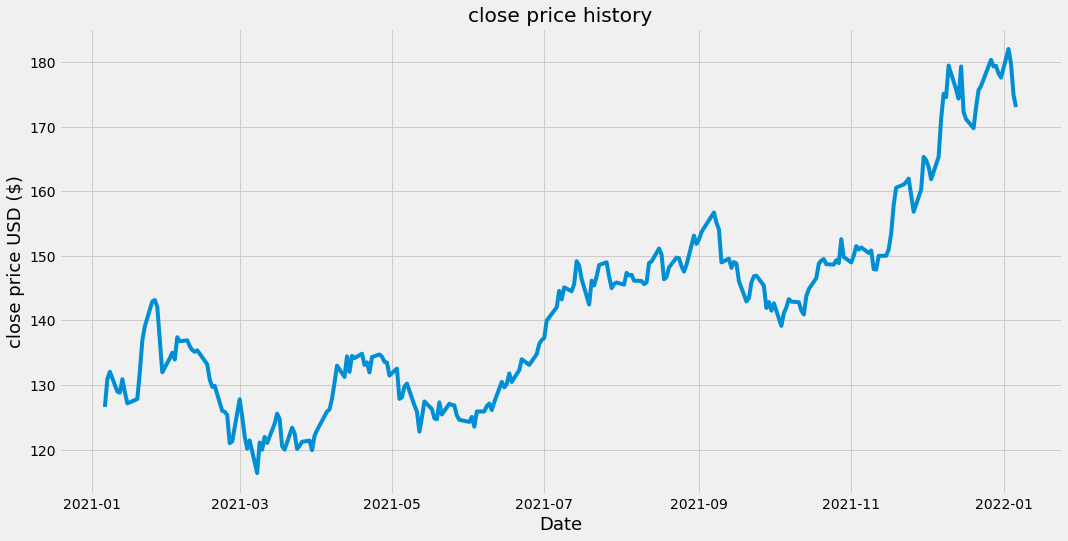

In [13]:
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date' , fontsize =18)
plt.ylabel('close price USD ($)' , fontsize =18)
plt.show()

In [14]:
data = df.filter(['Close'])
dataset = data.values
training_data_len= math.ceil(len(dataset) * .8)
training_data_len

204

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.15597864],
       [0.22178215],
       [0.23899472],
       [0.19223147],
       [0.18948977],
       [0.2213252 ],
       [0.19116533],
       [0.1642041 ],
       [0.17471443],
       [0.23869001],
       [0.31241426],
       [0.34592548],
       [0.40456968],
       [0.40822552],
       [0.39146991],
       [0.31576538],
       [0.23762388],
       [0.27083015],
       [0.2837777 ],
       [0.26778374],
       [0.32033511],
       [0.3107387 ],
       [0.31302368],
       [0.29931448],
       [0.28987052],
       [0.28591022],
       [0.28956581],
       [0.25635952],
       [0.22056354],
       [0.20335121],
       [0.2057882 ],
       [0.1468393 ],
       [0.14470679],
       [0.13693828],
       [0.07052547],
       [0.07463826],
       [0.17410512],
       [0.13343492],
       [0.08682403],
       [0.05742569],
       [0.07707536],
       [0.        ],
       [0.07204867],
       [0.05514093],
       [0.08530082],
       [0.07113478],
       [0.11622236],
       [0.140

In [17]:
train_data = scaled_data[0: training_data_len , : ]
x_train =[]
y_train =[]
for i in range( 60 , len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i , 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.15597864, 0.22178215, 0.23899472, 0.19223147, 0.18948977,
       0.2213252 , 0.19116533, 0.1642041 , 0.17471443, 0.23869001,
       0.31241426, 0.34592548, 0.40456968, 0.40822552, 0.39146991,
       0.31576538, 0.23762388, 0.27083015, 0.2837777 , 0.26778374,
       0.32033511, 0.3107387 , 0.31302368, 0.29931448, 0.28987052,
       0.28591022, 0.28956581, 0.25635952, 0.22056354, 0.20335121,
       0.2057882 , 0.1468393 , 0.14470679, 0.13693828, 0.07052547,
       0.07463826, 0.17410512, 0.13343492, 0.08682403, 0.05742569,
       0.07707536, 0.        , 0.07204867, 0.05514093, 0.08530082,
       0.07113478, 0.11622236, 0.14028941, 0.12795128, 0.06351863,
       0.05529318, 0.107083  , 0.09413558, 0.05681638, 0.06443253,
       0.07387659, 0.07661841, 0.05392234, 0.088195  , 0.10114242])]
[0.14531609858182182]



In [18]:
x_train , y_train = np.array(x_train) , np.array(y_train)

In [19]:
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1], 1))
x_train.shape

(144, 60, 1)

In [20]:
model = Sequential()
model.add(LSTM(50 , return_sequences=True , input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50 , return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [21]:
model.compile(optimizer= 'adam' , loss= 'mean_squared_error')


In [22]:
model.fit(x_train , y_train , batch_size=1 , epochs=1)

144/144 [==============================] - 7s 27ms/step - loss: 0.0081


In [23]:
test_data = scaled_data[training_data_len-60: , : ]
x_test =[]
y_test =dataset[training_data_len: , : ]
for i in range(60 , len(test_data)):
  x_test.append(test_data[i-60 : i , 0])
  

In [24]:
x_test = np.array(x_test)

In [25]:
x_test = np.reshape(x_test, (x_test.shape[0] , x_test.shape[1] , 1))


In [26]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [27]:
rmse = np.sqrt(np.mean(predictions - y_test) **2 )
rmse

10.739679506796874

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


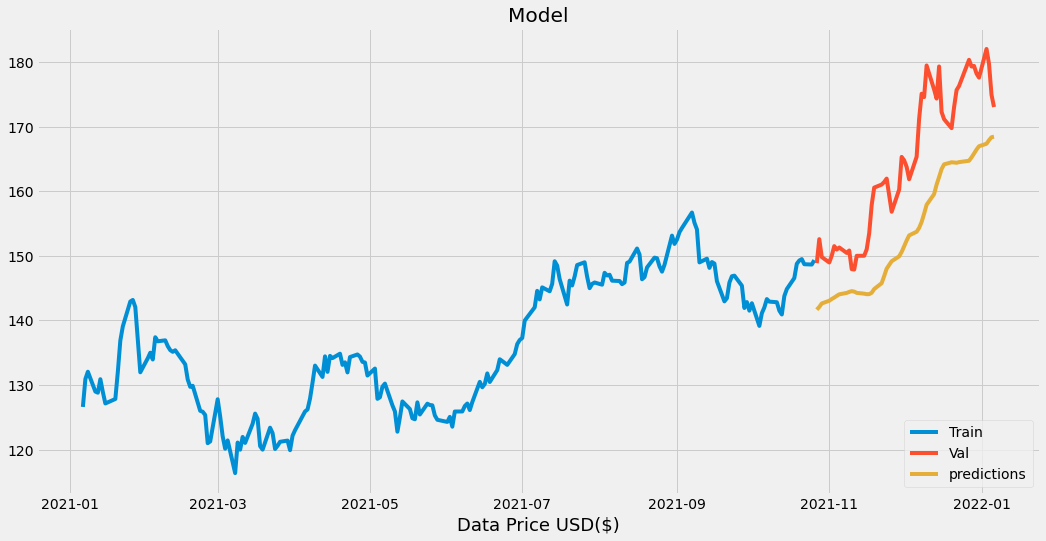

In [28]:
train = data[ : training_data_len]
valid = data[training_data_len :]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data Price USD($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'predictions']])
plt.legend(['Train' , 'Val' , 'predictions'] , loc='lower right')
plt.show() 

In [29]:
valid

,Close,predictions
Date,,
2021-10-27,148.850006,141.658493
2021-10-28,152.570007,142.073608
2021-10-29,149.800003,142.616592
2021-11-01,148.960007,143.036011
2021-11-02,150.020004,143.307327
2021-11-03,151.490005,143.530869
2021-11-04,150.960007,143.792847
2021-11-05,151.279999,144.028122
2021-11-08,150.440002,144.251511
